## **음주 여부에 따른 건강검진 수치**

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
import os
if os.name == 'posix':
    plt.rc('font', family = 'AppleGothic')
    
else:
    plt.rc("font", family = 'Malgun Gothic')

plt.rc('axes', unicode_minus=False)
%config InlineBackend.figure_format = 'retina'

In [3]:
df = pd.read_csv('csv/health.csv', encoding = "cp949")  ##출처: 공공데이터 포털 건강검진 데이터
df.shape

(1000000, 31)

In [4]:
df.head()

,기준년도,가입자 일련번호,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석,데이터 공개일자
0,2020,1,36,1,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,1.0,0.0,0,NaN,NaN,2021-12-29
1,2020,2,27,2,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,1.0,0.0,0,NaN,NaN,2021-12-29
2,2020,3,11,2,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,1.0,0.0,0,NaN,NaN,2021-12-29
3,2020,4,31,1,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,1.0,0.0,1,0.0,0.0,2021-12-29
4,2020,5,41,2,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,1.0,0.0,0,NaN,NaN,2021-12-29


#### ***결측치**

<AxesSubplot:>

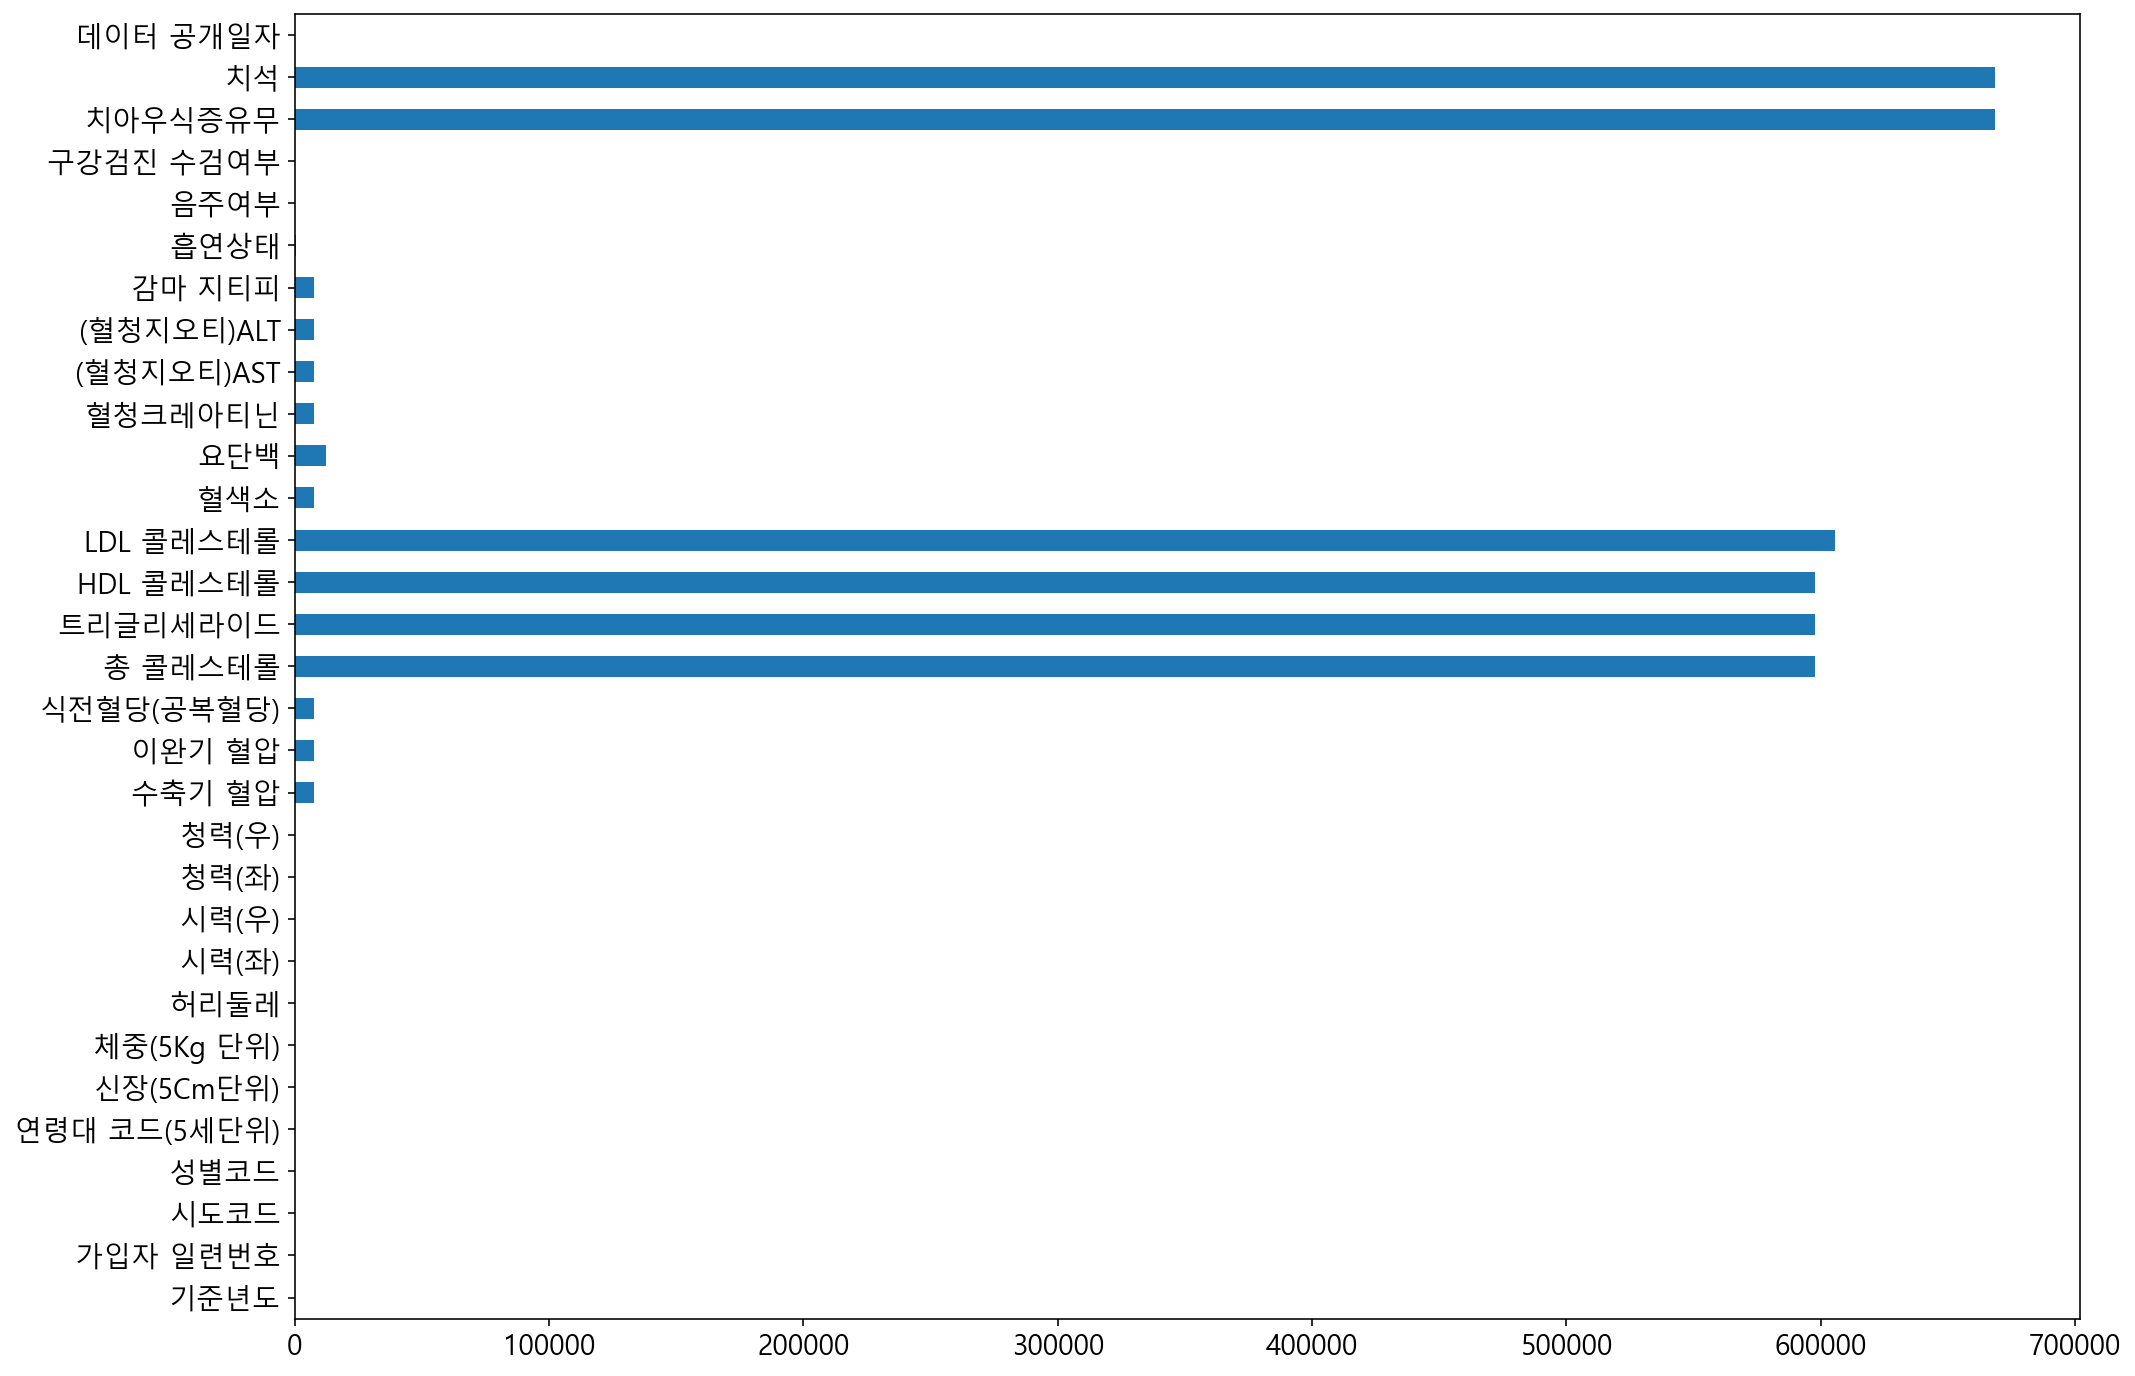

In [17]:
df.isnull().sum().plot.barh(figsize = (16,12), fontsize = 14)

#### **일부 칼럼 가져오기**

In [19]:
df[['(혈청지오티)ALT', '(혈청지오티)AST', '요단백', '혈색소']].head()

,(혈청지오티)ALT,(혈청지오티)AST,요단백,혈색소
0,27.0,21.0,1.0,15.0
1,15.0,18.0,1.0,12.7
2,25.0,27.0,1.0,12.8
3,97.0,65.0,1.0,16.4
4,17.0,18.0,1.0,12.4


In [21]:
df[['(혈청지오티)ALT', '(혈청지오티)AST', '요단백', '혈색소']].describe()

,(혈청지오티)ALT,(혈청지오티)AST,요단백,혈색소
count,992398.000000,992399.000000,987859.000000,992389.00000
mean,26.759641,27.698337,1.122333,14.20946
std,25.835091,25.286659,0.493386,1.55418
min,1.000000,1.000000,1.000000,1.00000
25%,16.000000,20.000000,1.000000,13.20000
50%,21.000000,24.000000,1.000000,14.20000
75%,31.000000,30.000000,1.000000,15.30000
max,5990.000000,8712.000000,6.000000,25.00000


In [24]:
df[ '흡연상태'].value_counts()

1.0    626138
2.0    189808
3.0    183711
Name: 흡연상태, dtype: int64

### **groupby와 pivot table**

In [25]:
df.groupby(['성별코드']).mean()

,기준년도,가입자 일련번호,시도코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),...,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석
성별코드,,,,,,,,,,,,,,,,,,,,,
1,2020.0,500358.619823,34.283801,11.778801,167.452735,69.713162,86.164883,0.98318,0.988278,1.048482,...,1.143432,0.968119,29.336907,31.001443,49.718945,2.014826,0.741792,0.362892,0.182544,0.610137
2,2020.0,499626.733920,33.801335,12.062784,154.191945,56.117776,78.382718,0.88072,0.879468,1.044093,...,1.100177,0.730214,25.980277,22.312075,25.258336,1.080009,0.420934,0.298499,0.150885,0.552335


In [26]:
df.groupby(["성별코드", "음주여부"])["가입자 일련번호"].count()

성별코드  음주여부
1     0.0     131844
      1.0     378767
2     0.0     283275
      1.0     205918
Name: 가입자 일련번호, dtype: int64

In [28]:
df.groupby(["성별코드", "음주여부"])["요단백"].mean()

성별코드  음주여부
1     0.0     1.159183
      1.0     1.138002
2     0.0     1.101695
      1.0     1.098060
Name: 요단백, dtype: float64

In [30]:
df.groupby(["성별코드", "음주여부"])["혈색소"].describe()

count       mean       std  min   25%   50%   75%   max
성별코드 음주여부                                                            
1    0.0   130101.0  14.849656  1.418551  1.0  14.1  15.0  15.8  25.0
     1.0   377766.0  15.250099  1.176514  3.3  14.6  15.3  16.0  24.6
2    0.0   279034.0  13.205367  1.171629  2.8  12.6  13.3  13.9  25.0
     1.0   205292.0  13.253569  1.204101  1.3  12.7  13.4  14.0  19.8

In [44]:
df.groupby(["성별코드", "음주여부"])["감마 지티피"].agg(["count", "mean", "median"])

count       mean  median
성별코드 음주여부                           
1    0.0   130103  34.212195    25.0
     1.0   377769  55.059597    36.0
2    0.0   279033  24.177603    18.0
     1.0   205296  26.728777    18.0

In [38]:
df.pivot_table(index = "음주여부", values = "가입자 일련번호", aggfunc="count")

,가입자 일련번호
음주여부,
0.0,415119
1.0,584685


In [43]:
#음주여부에 따른 감마 지티피의 평균을 구한다
pd.pivot_table(df, index="음주여부", values="감마 지티피", aggfunc=["mean", "median"])

,mean,median
,감마 지티피,감마 지티피
음주여부,,
0.0,27.368548,20.0
1.0,45.084373,28.0


In [45]:
pd.pivot_table(df, index="음주여부", values="감마 지티피", aggfunc="describe")

,25%,50%,75%,count,max,mean,min,std
음주여부,,,,,,,,
0.0,15.0,20.0,30.0,409136.0,1731.0,27.368548,1.0,31.423282
1.0,18.0,28.0,48.0,583065.0,2630.0,45.084373,1.0,61.210826


### **히스토그램**

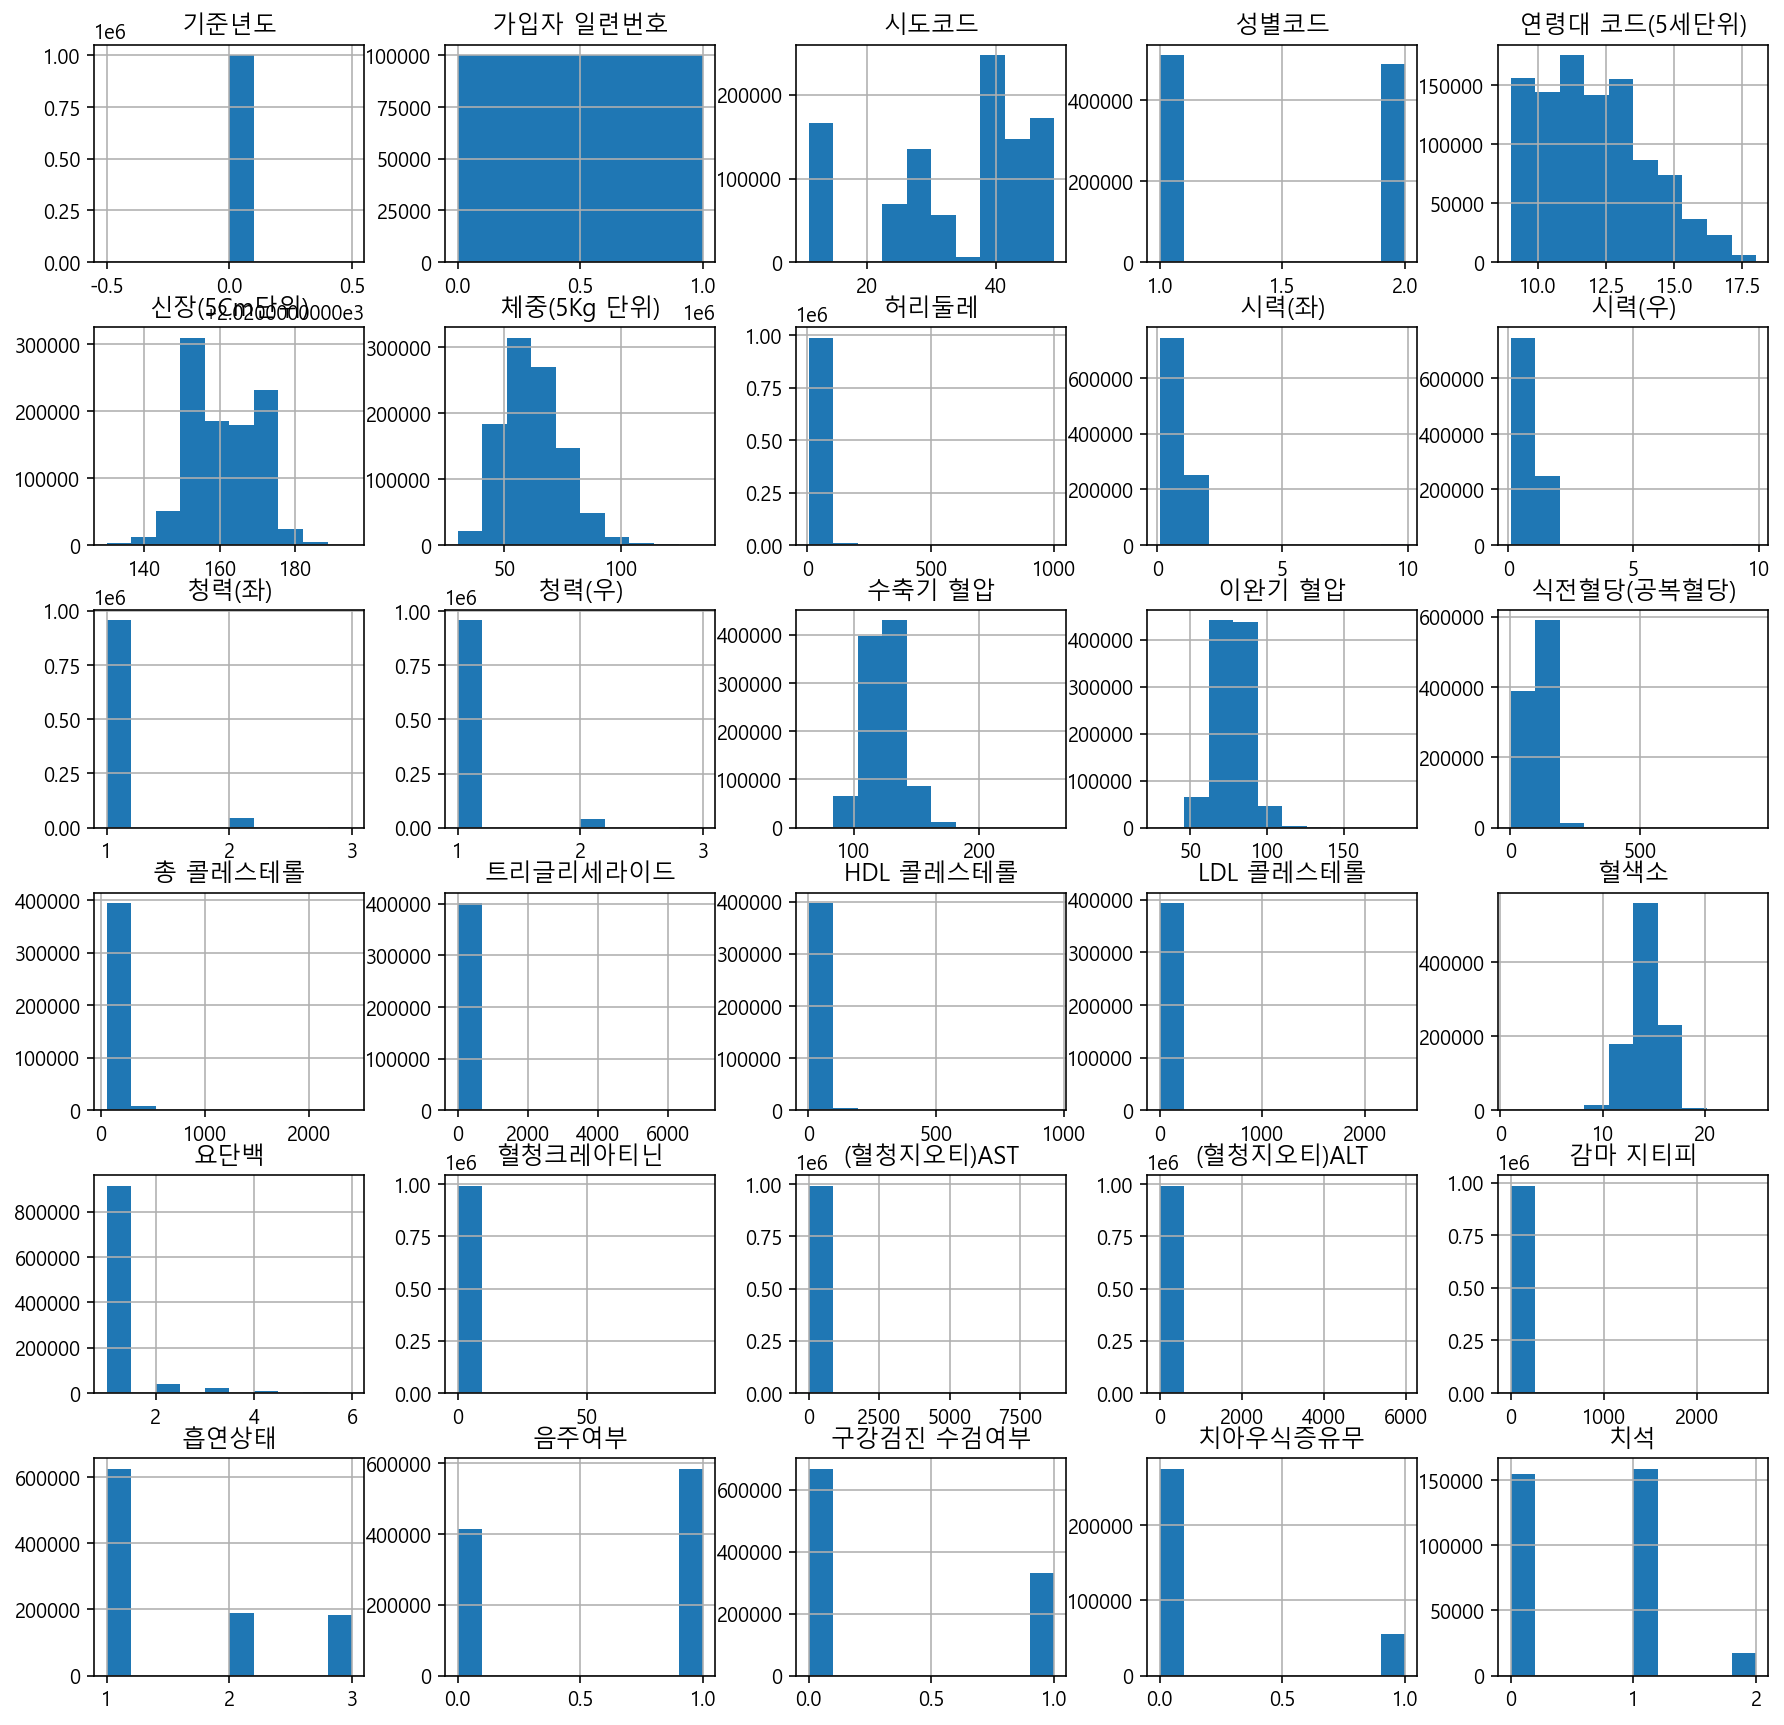

In [48]:
hist = df.hist(figsize = (15,15))

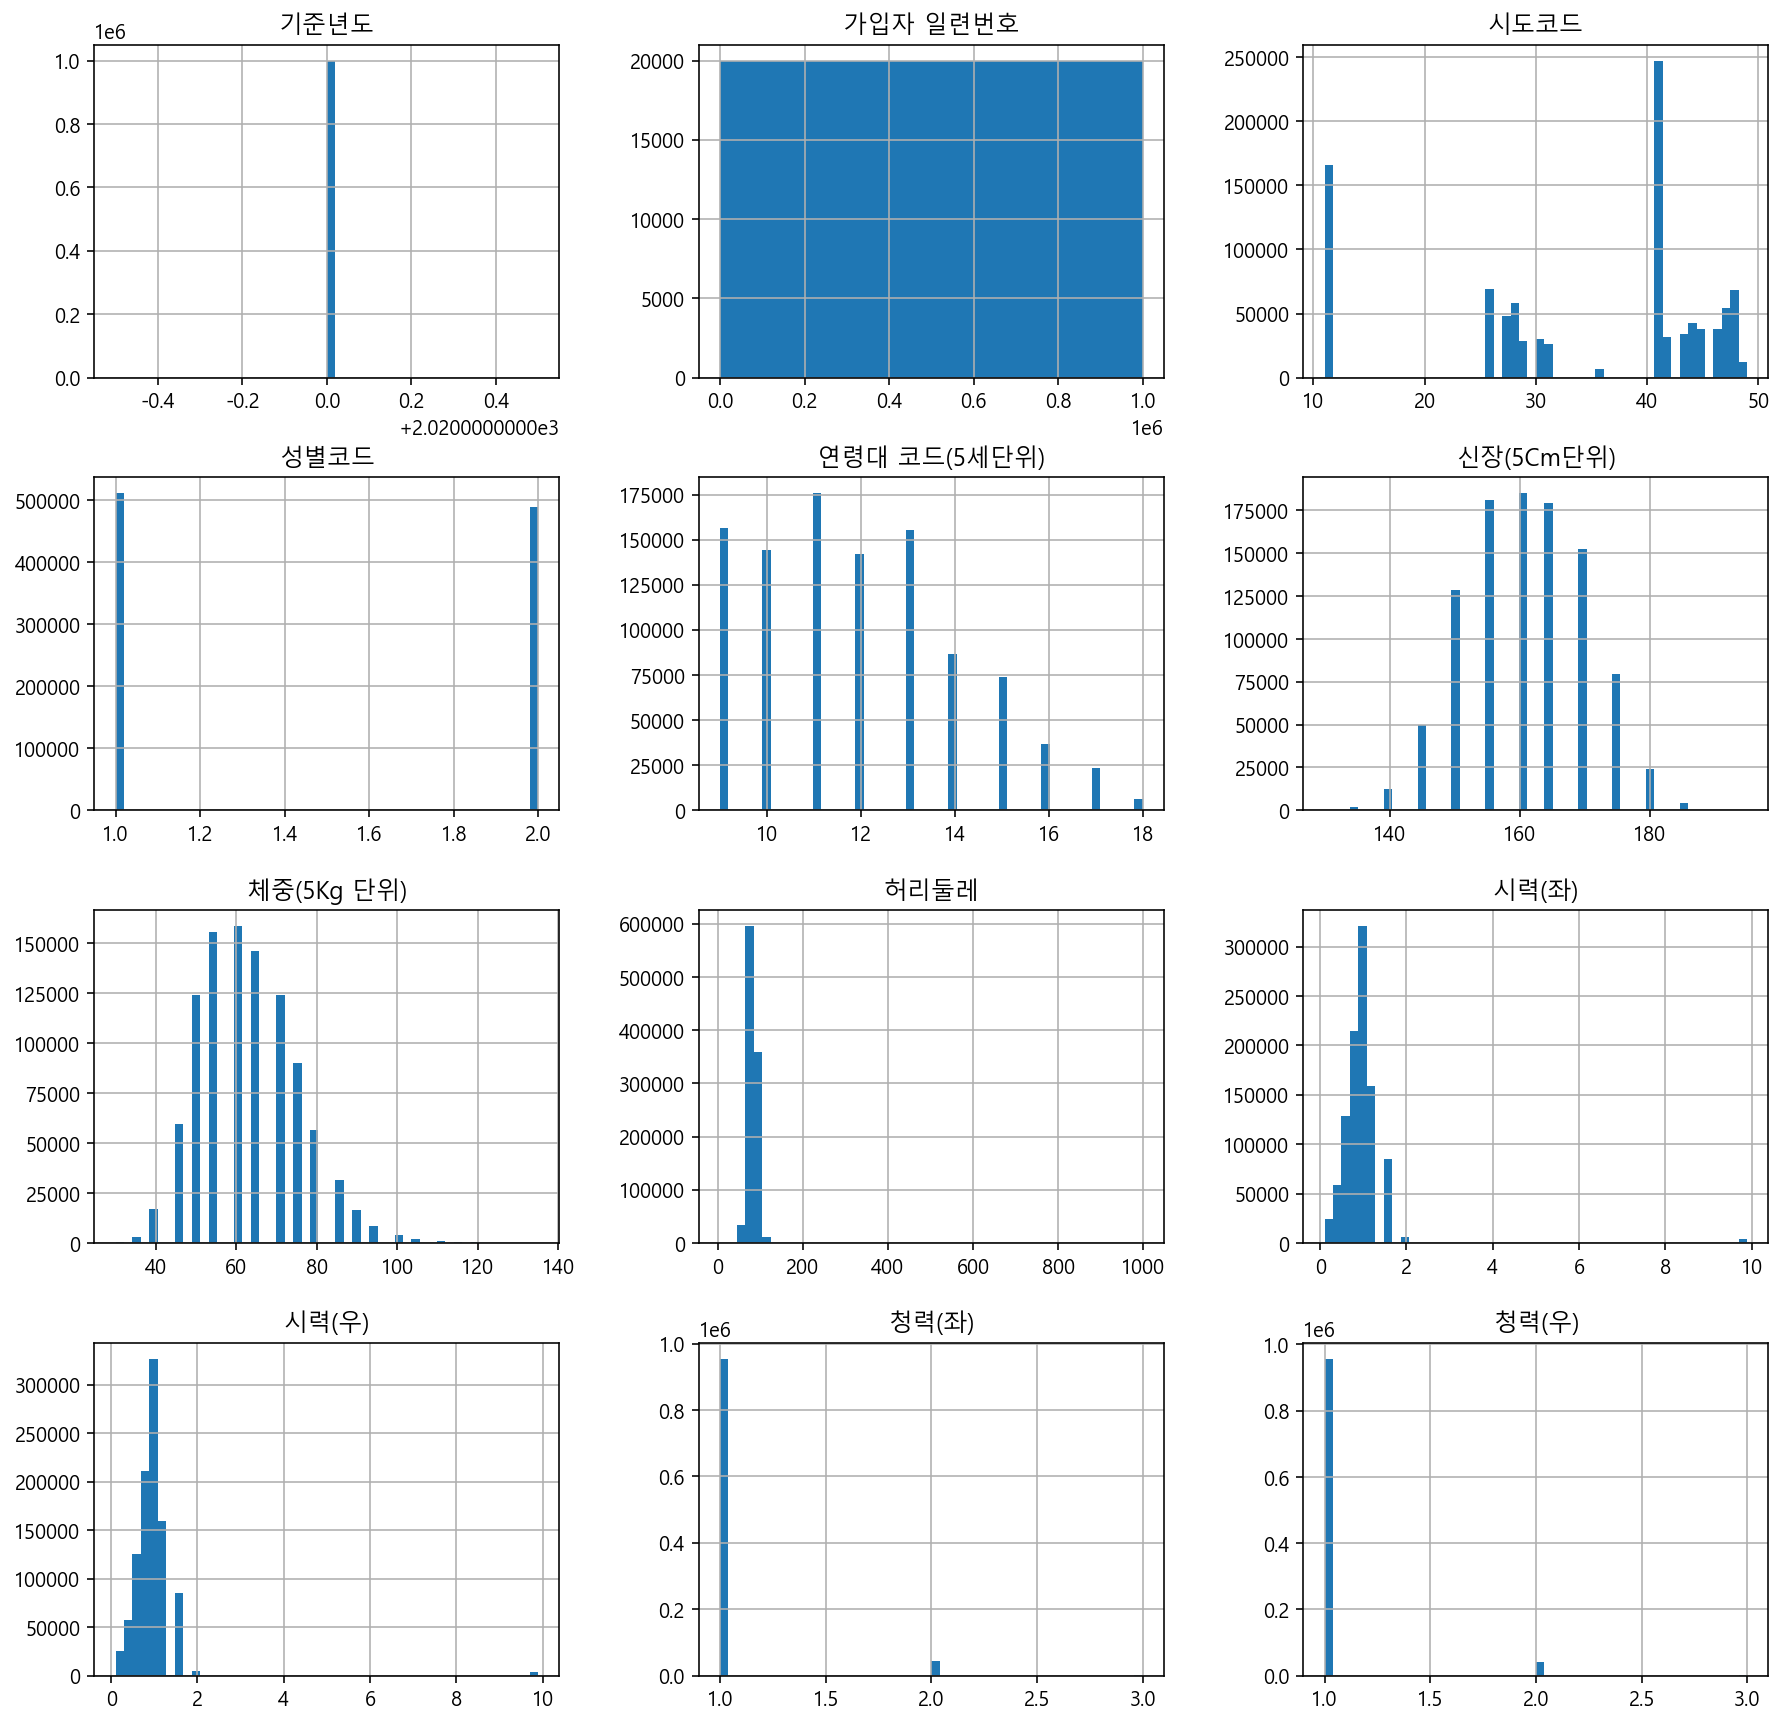

In [52]:
hist1 = df.iloc[:, :12].hist(figsize=(15,15), bins = 50)

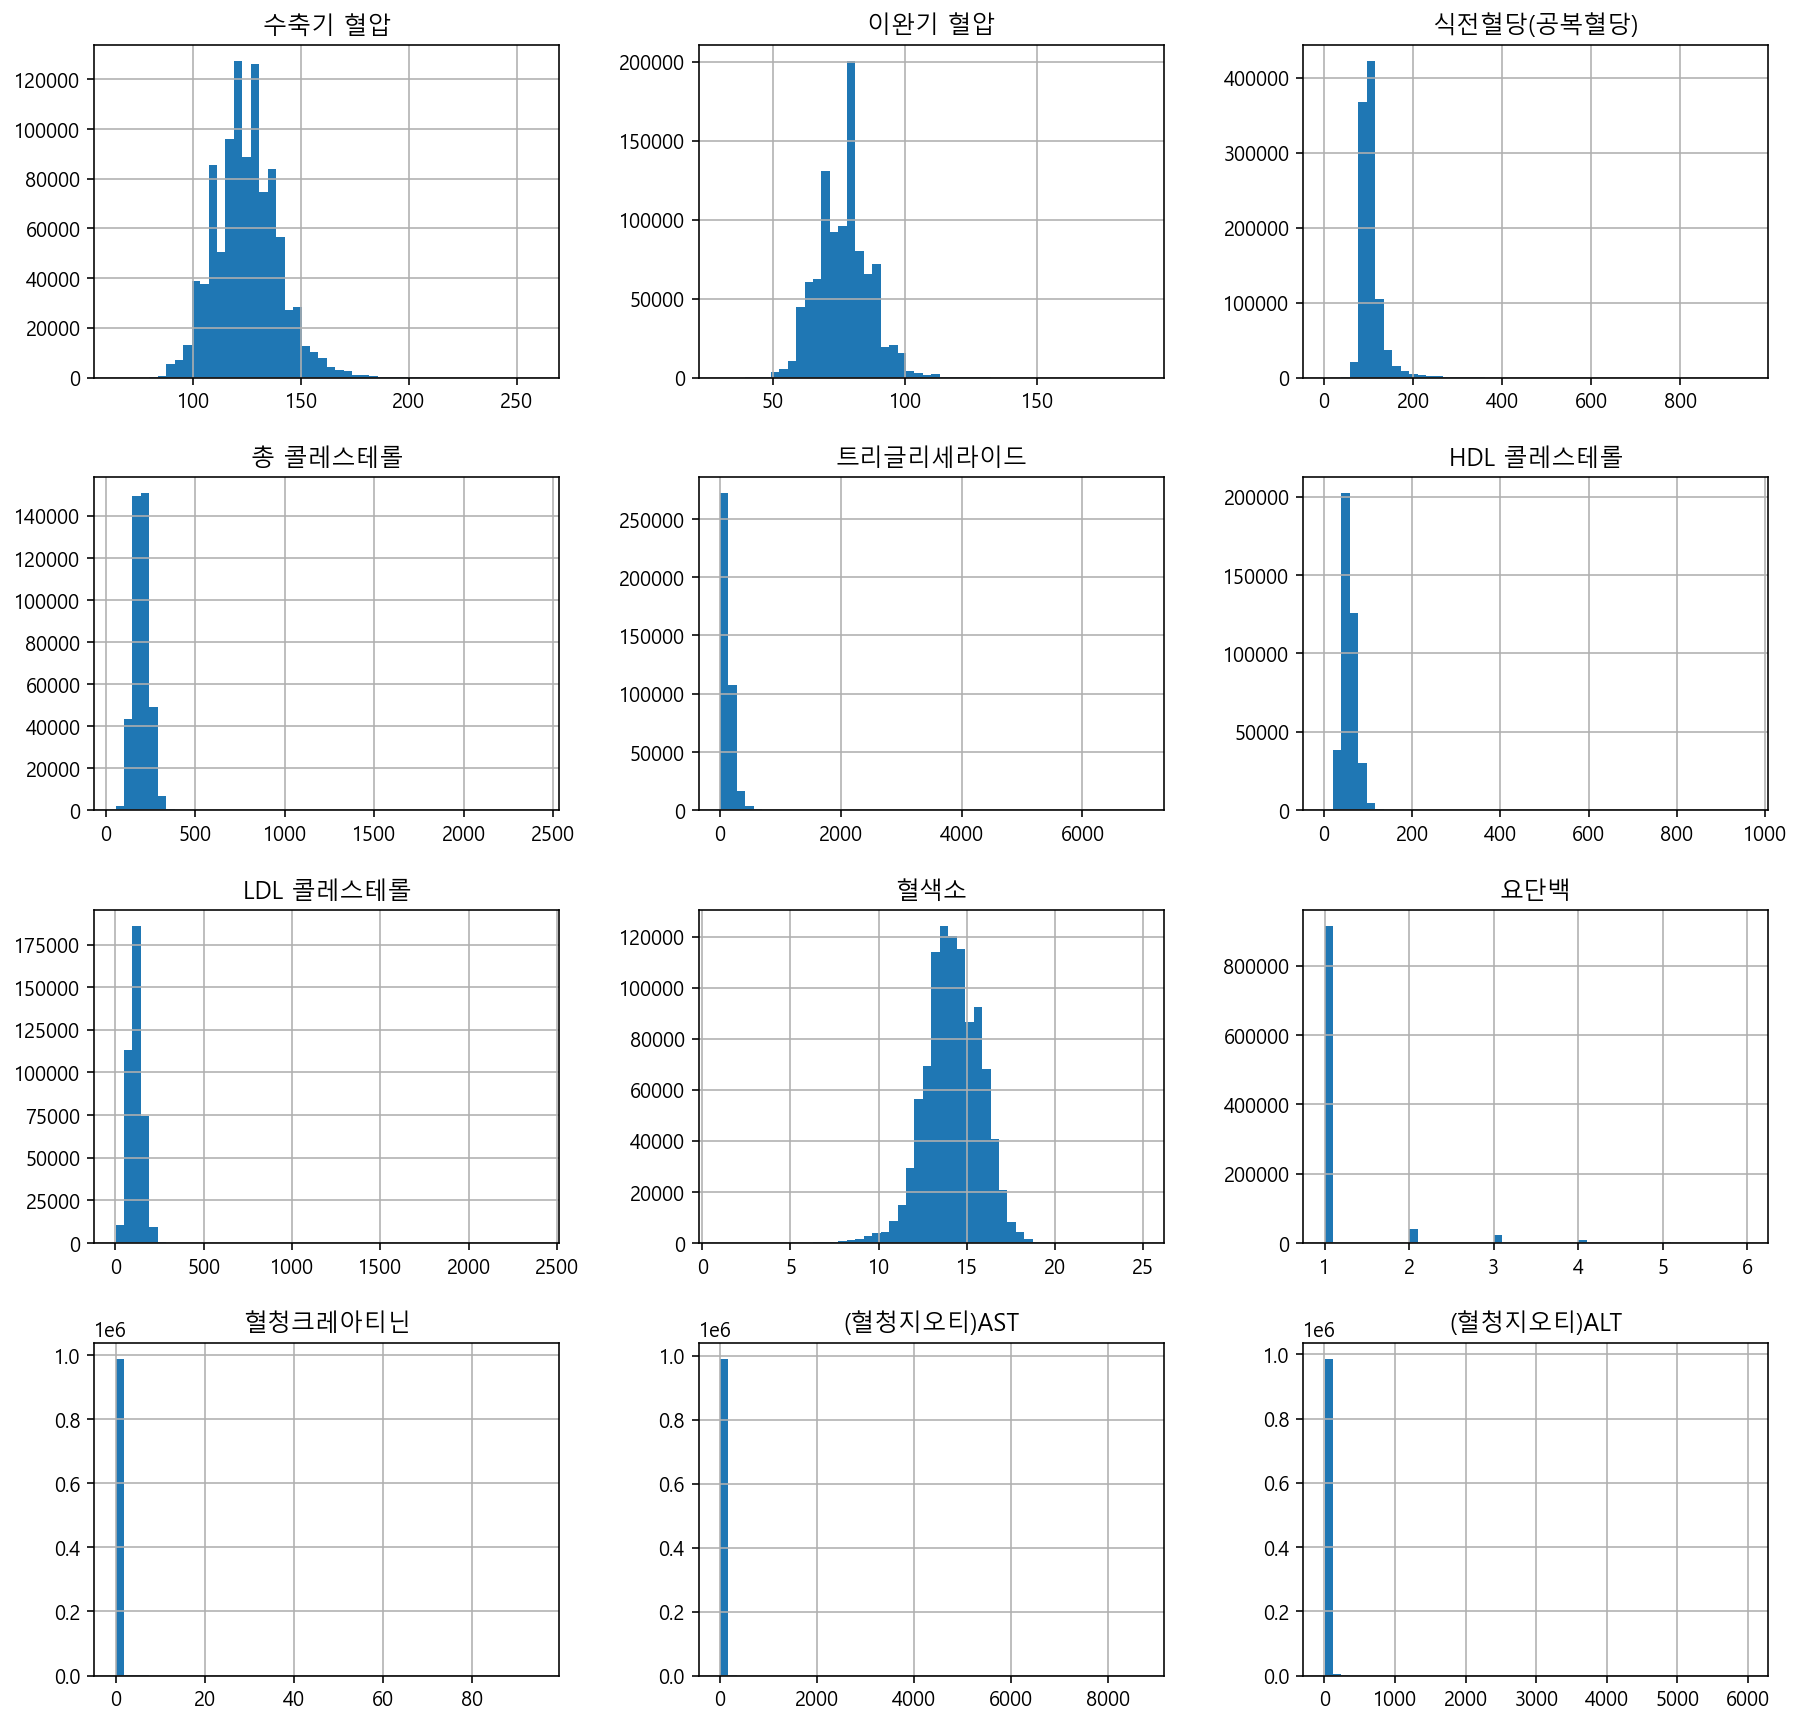

In [53]:
hist2 = df.iloc[:, 12:24].hist(figsize = (15,15), bins = 50)

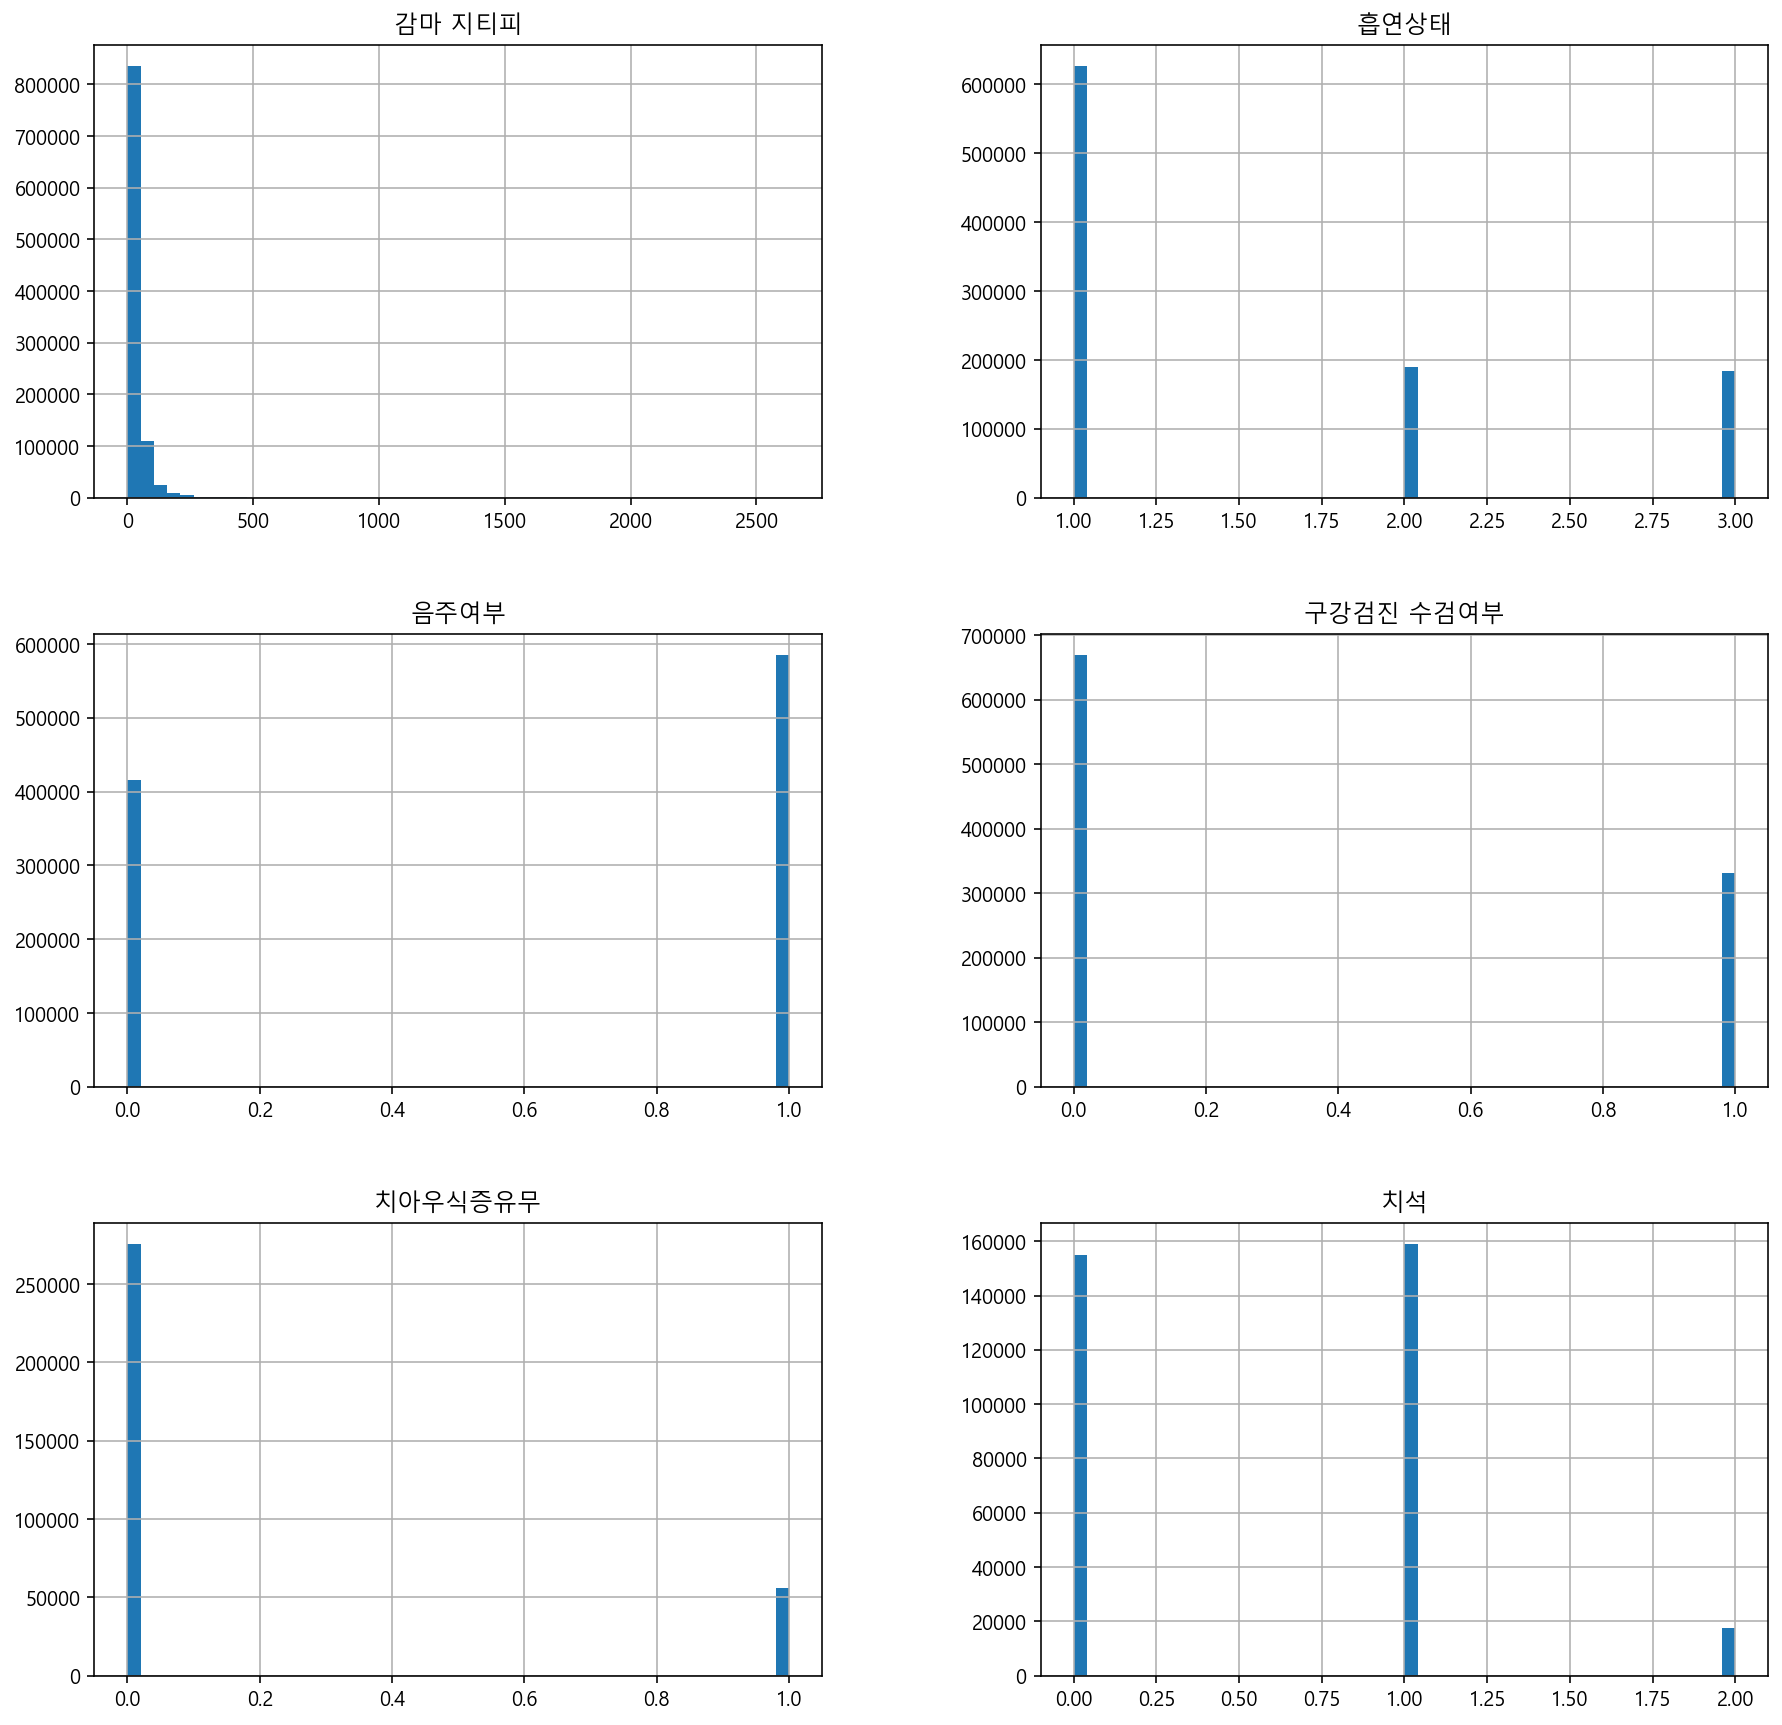

In [54]:
hist3 = df.iloc[:, 24:].hist(figsize = (15,15), bins = 50)

### **샘플 데이터 추출**

In [56]:
df_sample = df.sample(1000, random_state=1)
df_sample.shape

(1000, 31)

### **Seaborn으로 데이터 시각화**

##### **범주형 데이터**

<AxesSubplot:>

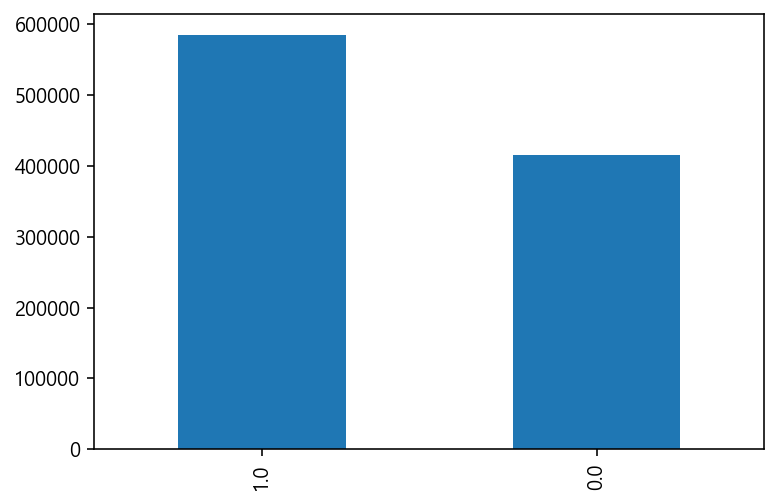

In [59]:
#countplot-음주여부

df["음주여부"].value_counts().plot.bar()

<AxesSubplot:xlabel='음주여부', ylabel='count'>

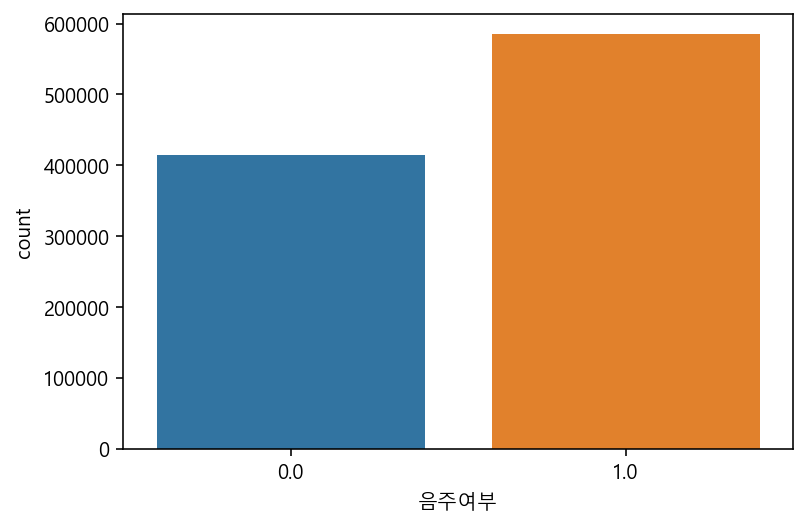

In [60]:
sns.countplot(x="음주여부", data=df)

<AxesSubplot:xlabel='음주여부', ylabel='count'>

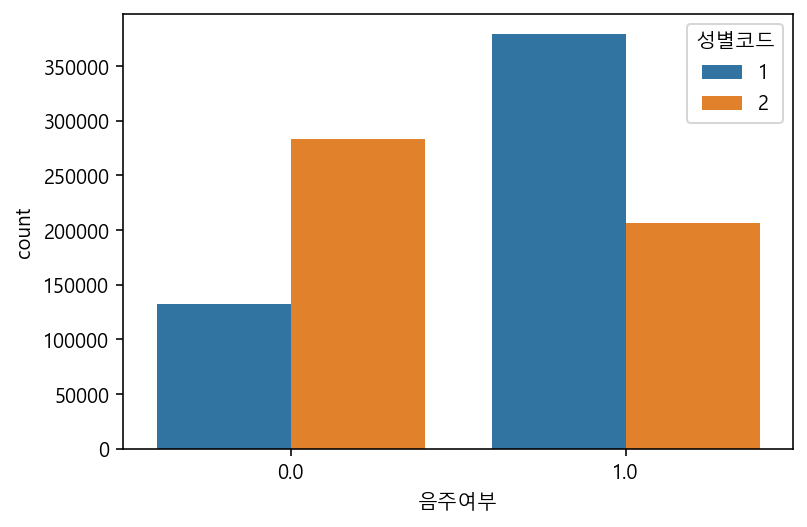

In [62]:
sns.countplot(data=df, x="음주여부", hue = "성별코드")

<AxesSubplot:xlabel='연령대 코드(5세단위)', ylabel='count'>

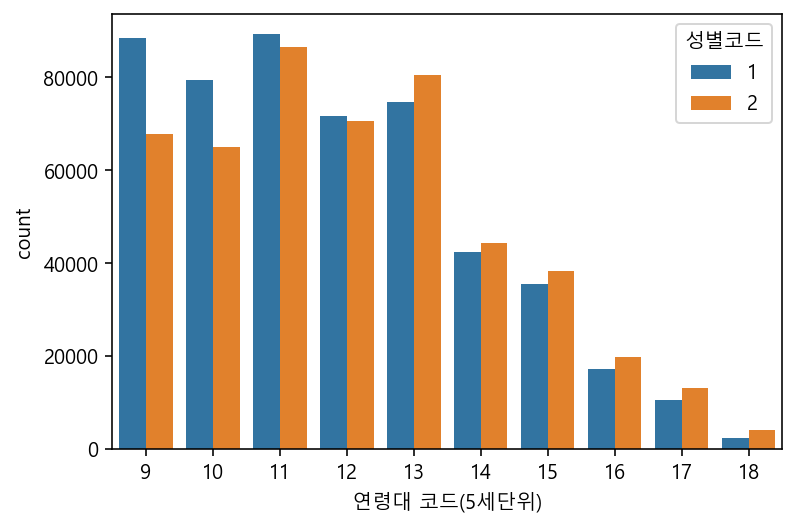

In [64]:
sns.countplot(data=df, x="연령대 코드(5세단위)", hue = "성별코드")

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='count'>

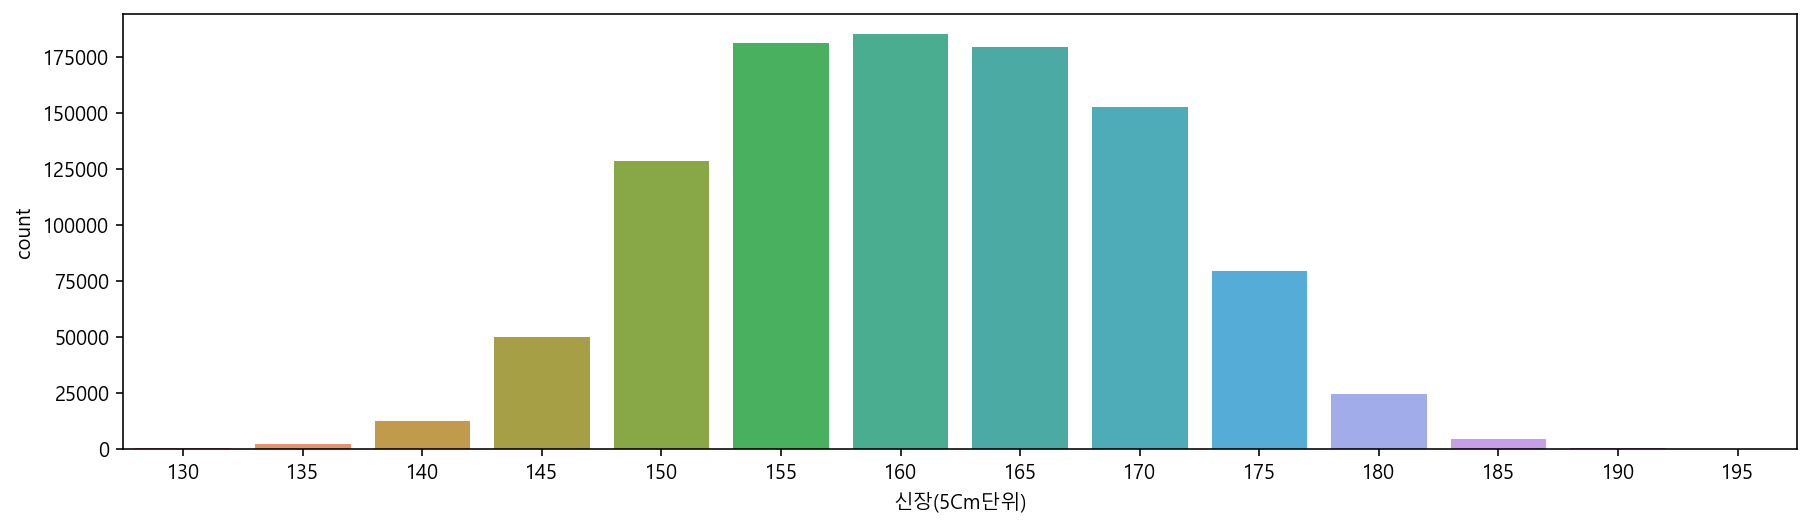

In [73]:
#countplot-키와 몸무게
plt.figure(figsize=(15,4))
sns.countplot(data=df, x="신장(5Cm단위)")

<AxesSubplot:xlabel='체중(5Kg 단위)', ylabel='count'>

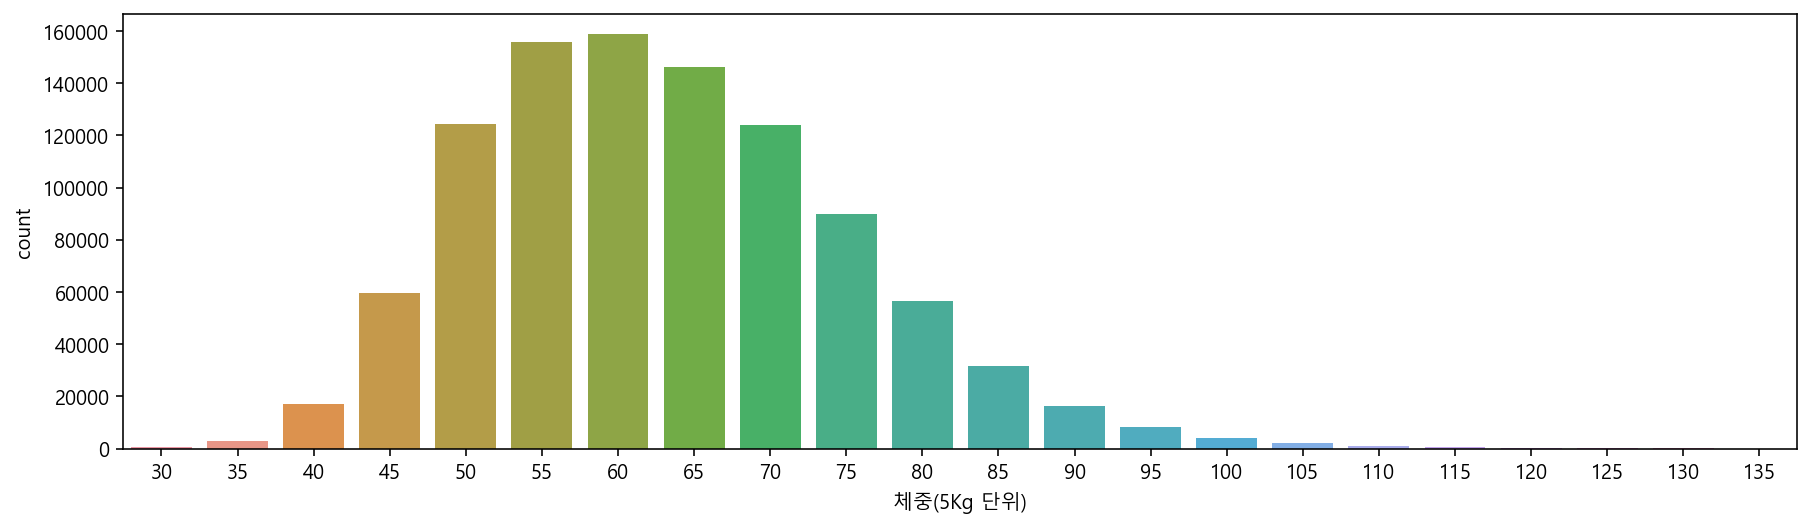

In [72]:
#countplot-키와 몸무게
plt.figure(figsize=(15,4))
sns.countplot(data=df, x="체중(5Kg 단위)")

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='count'>

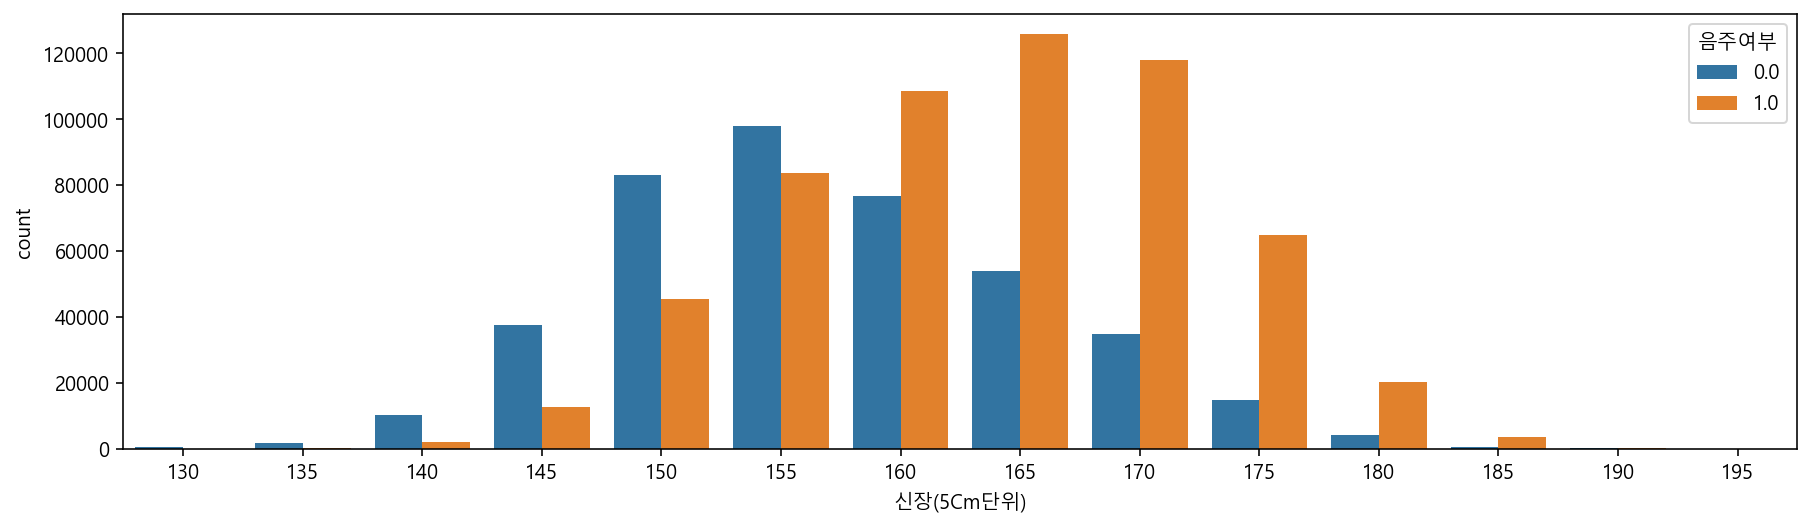

In [76]:
plt.figure(figsize=(15,4))
sns.countplot(data=df, x="신장(5Cm단위)", hue = "음주여부")

<AxesSubplot:xlabel='체중(5Kg 단위)', ylabel='count'>

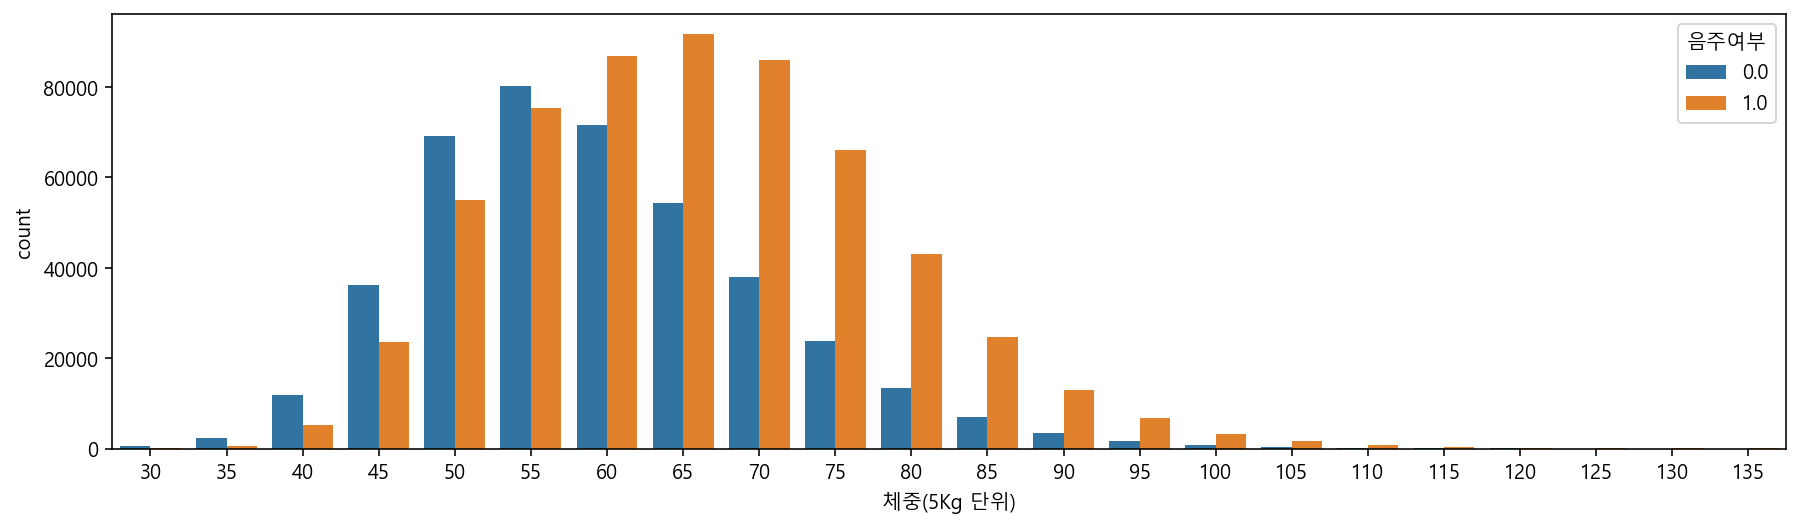

In [77]:
plt.figure(figsize=(15,4))
sns.countplot(data=df, x="체중(5Kg 단위)", hue = "음주여부")

<AxesSubplot:xlabel='연령대 코드(5세단위)', ylabel='총 콜레스테롤'>

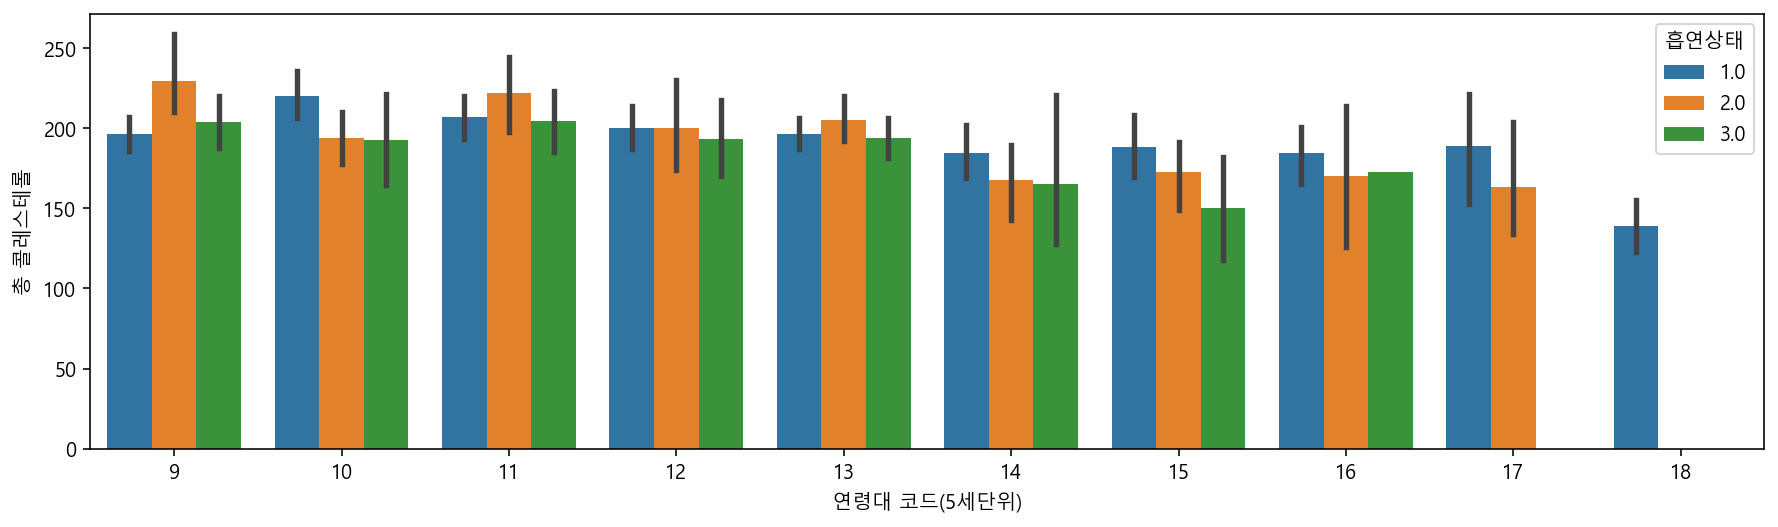

In [83]:
#barplot-수치형 vs. 범주형 데이터 시각화
plt.figure(figsize = (15,4))
sns.barplot(data=df_sample, x="연령대 코드(5세단위)", y="총 콜레스테롤", hue="흡연상태")

<AxesSubplot:xlabel='연령대 코드(5세단위)', ylabel='체중(5Kg 단위)'>

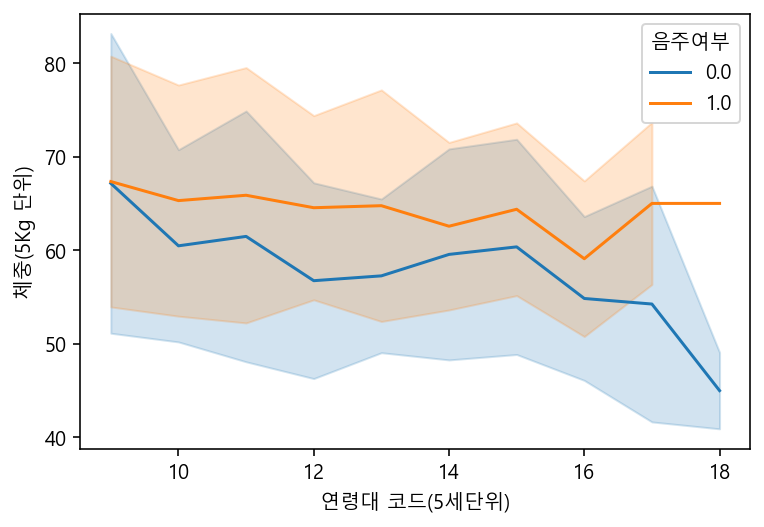

In [89]:
#lineplot and pointplot
#연령대 코드에 따른 체중
sns.lineplot(data=df_sample, x="연령대 코드(5세단위)", y="체중(5Kg 단위)", hue = "음주여부", ci = "sd")

<AxesSubplot:xlabel='연령대 코드(5세단위)', ylabel='신장(5Cm단위)'>

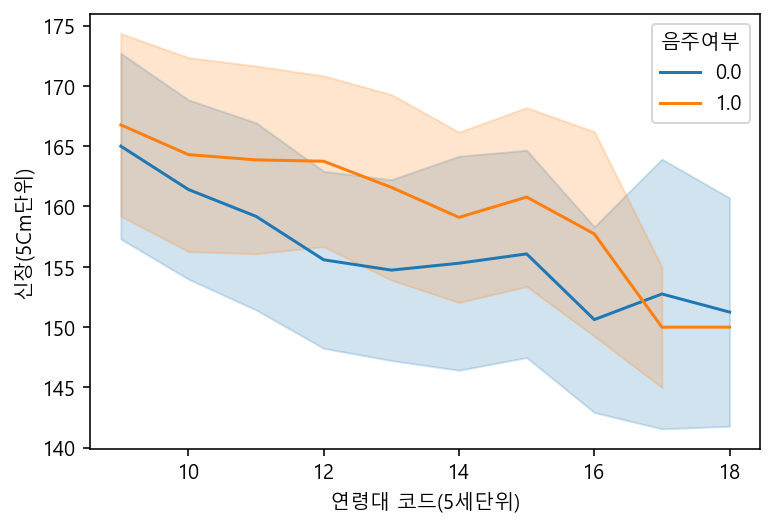

In [92]:
#연령대 코드에 따른 신장
sns.lineplot(data=df_sample, x="연령대 코드(5세단위)", y="신장(5Cm단위)", hue = "음주여부", ci="sd")

<AxesSubplot:xlabel='연령대 코드(5세단위)', ylabel='혈색소'>

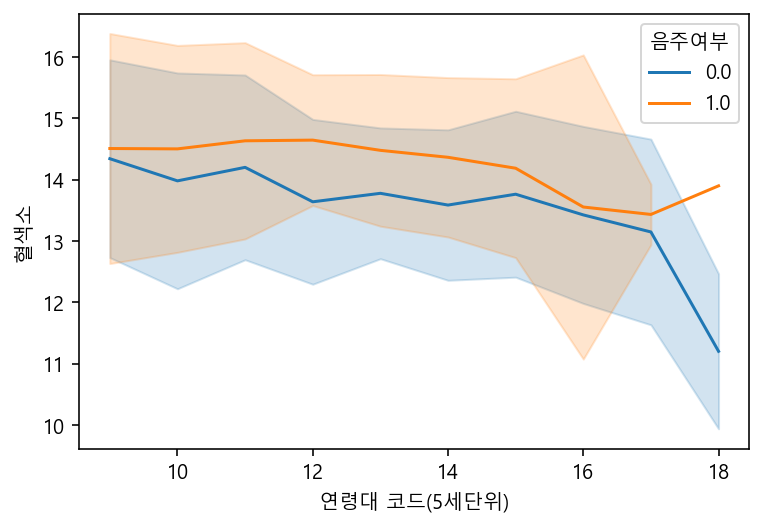

In [93]:
#연령대 코드에 따른 혈색소
sns.lineplot(data=df_sample, x="연령대 코드(5세단위)", y="혈색소", hue = "음주여부", ci="sd")

<AxesSubplot:xlabel='연령대 코드(5세단위)', ylabel='혈색소'>

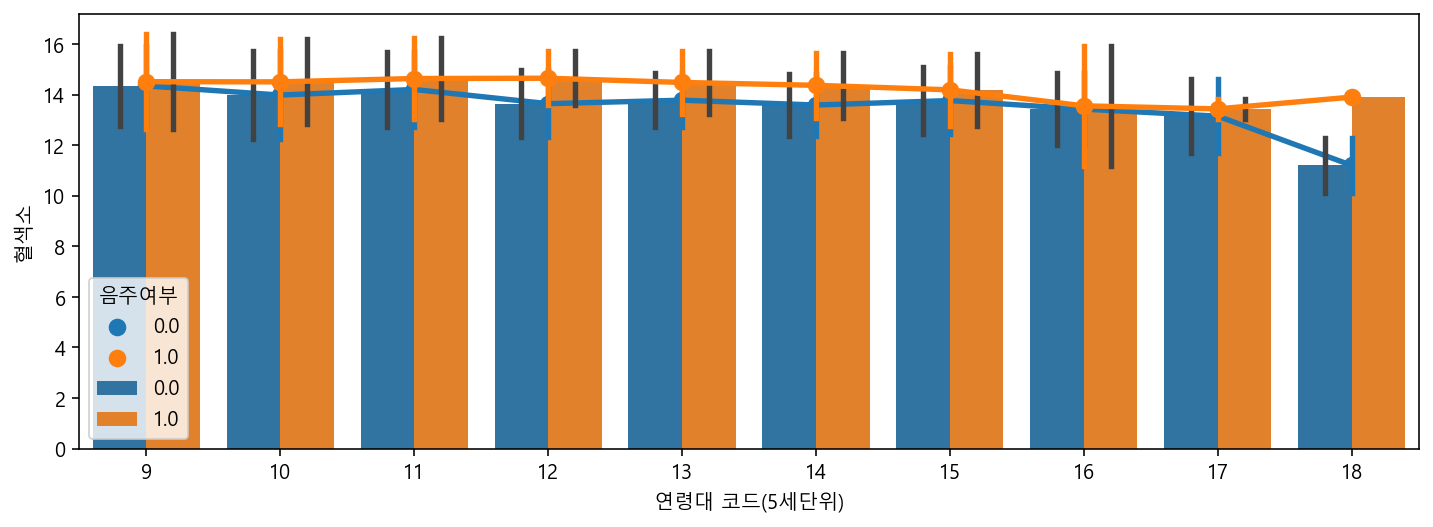

In [95]:
#연령대 코드에 따른 혈색소 barplot, pointplot
plt.figure(figsize = (12,4))
sns.barplot(data=df_sample, x="연령대 코드(5세단위)", y="혈색소", hue = "음주여부", ci="sd")
sns.pointplot(data=df_sample, x="연령대 코드(5세단위)", y="혈색소", hue = "음주여부", ci="sd")

<AxesSubplot:xlabel='연령대 코드(5세단위)', ylabel='혈색소'>

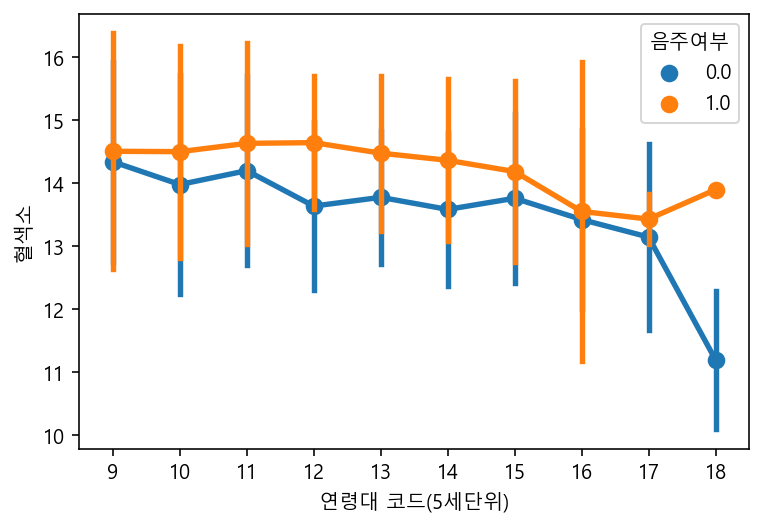

In [96]:
sns.pointplot(data=df_sample, x="연령대 코드(5세단위)", y="혈색소", hue = "음주여부", ci="sd")

##### **수치형 데이터**

<AxesSubplot:xlabel='식전혈당(공복혈당)', ylabel='혈색소'>

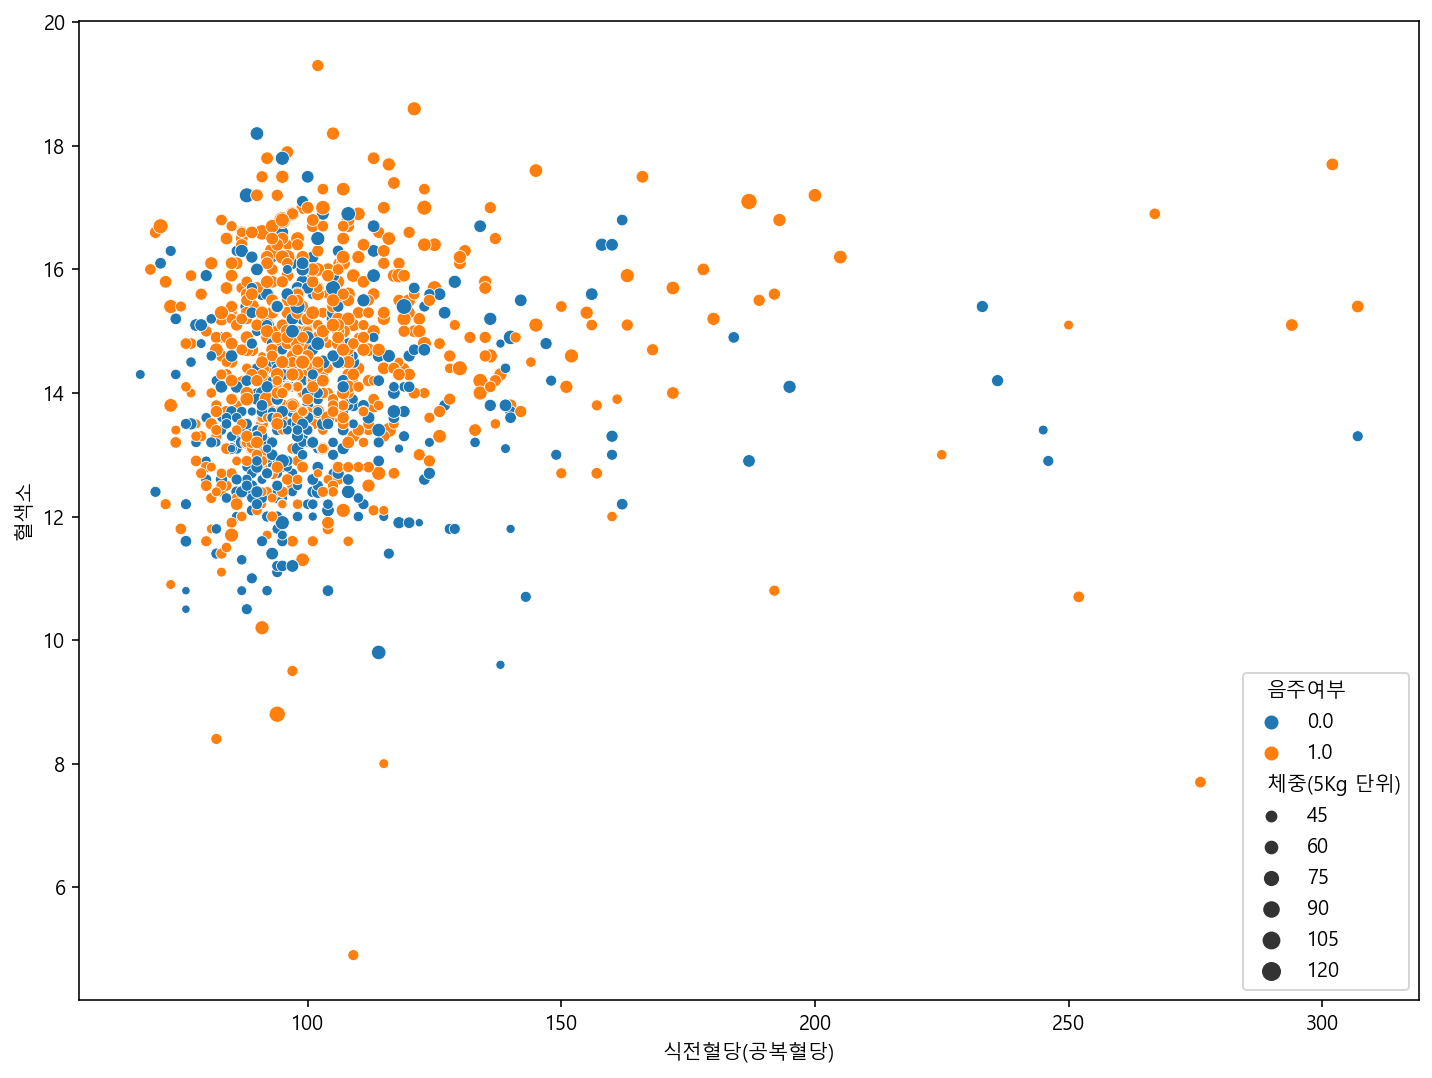

In [112]:
#scatterplot-산점도
plt.figure(figsize = (12,9))
sns.scatterplot(data=df_sample, x="식전혈당(공복혈당)", y="혈색소", hue = "음주여부", size="체중(5Kg 단위)")

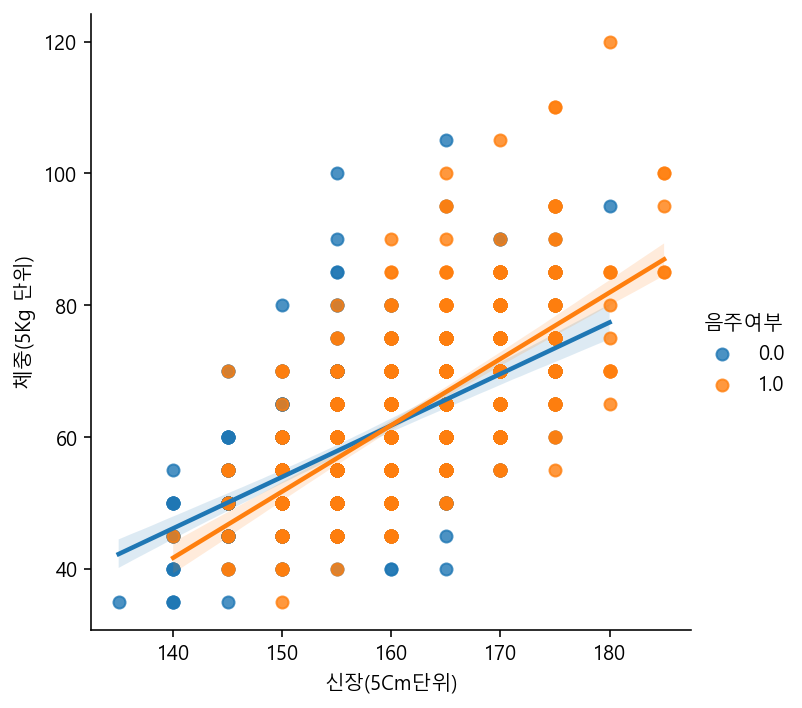

In [116]:
#lmplot-상관관계 보기
sns.lmplot(data = df_sample, x="신장(5Cm단위)", y="체중(5Kg 단위)", hue = "음주여부")

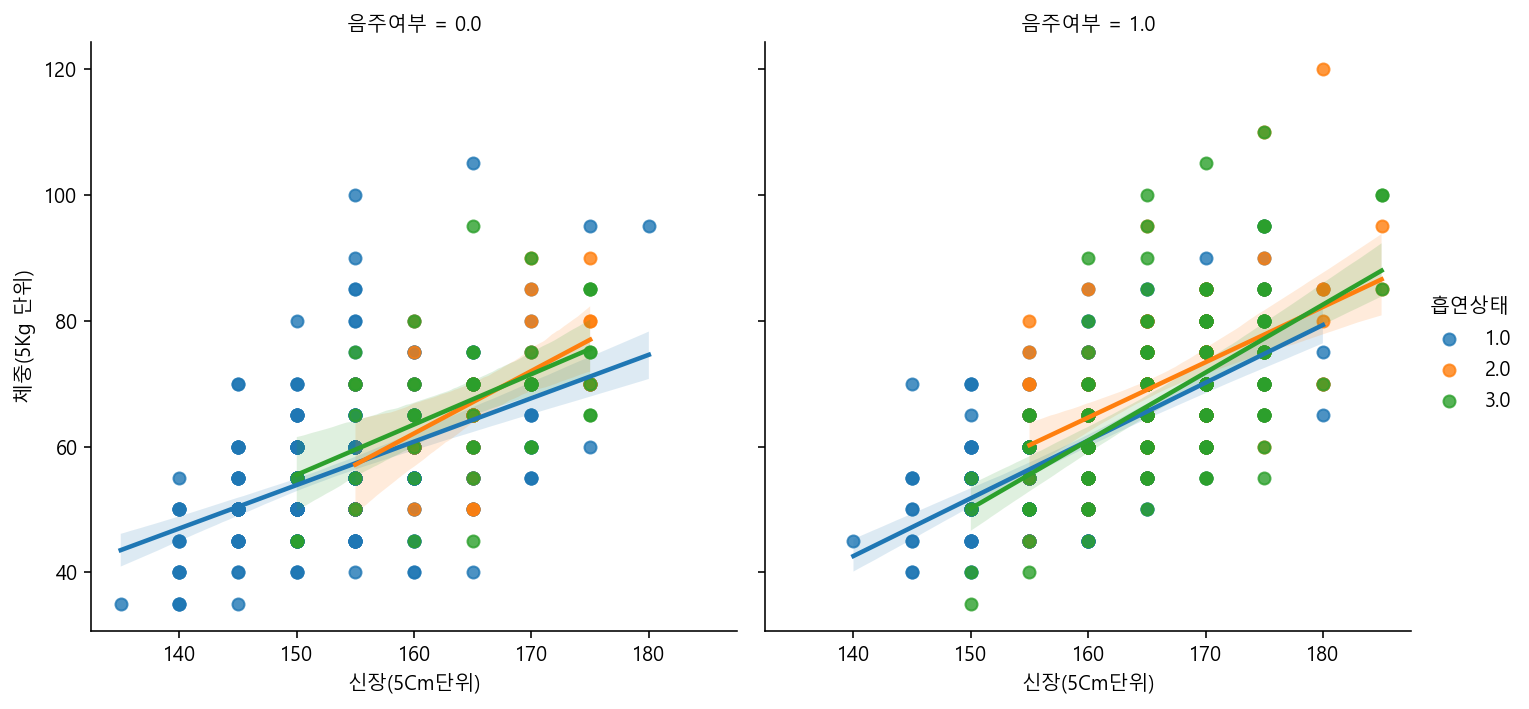

In [117]:
sns.lmplot(data = df_sample, x="신장(5Cm단위)", y="체중(5Kg 단위)", hue = "흡연상태", col="음주여부")

<Figure size 1080x432 with 0 Axes>

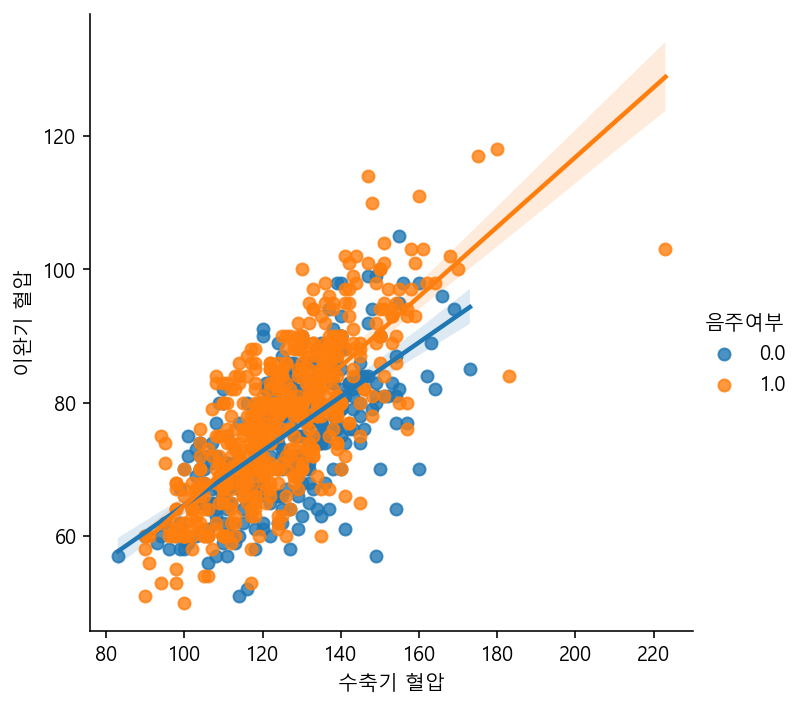

In [120]:
plt.figure(figsize=(15,6))
sns.lmplot(data = df_sample, x="수축기 혈압", y="이완기 혈압", hue = "음주여부")

### **이상치 다루기**

In [124]:
#(혈청지오티)AST와 (혈청지오티)ALT 가 400 이하인 값만 다루기
df_ASLT = df_sample[(df_sample['(혈청지오티)AST'] < 400) & (df_sample['(혈청지오티)ALT'] < 400)]
df_ASLT

,기준년도,가입자 일련번호,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석,데이터 공개일자
276826,2020,276827,41,2,10,160,45,67.0,1.2,1.2,...,0.5,29.0,26.0,14.0,1.0,0.0,1,0.0,1.0,2021-12-29
849425,2020,849426,29,1,10,165,70,86.0,1.0,1.2,...,0.8,31.0,25.0,28.0,1.0,1.0,1,0.0,0.0,2021-12-29
504499,2020,504500,28,1,15,165,65,89.0,0.9,0.9,...,1.1,26.0,25.0,29.0,2.0,0.0,0,NaN,NaN,2021-12-29
601054,2020,601055,11,1,11,165,50,76.0,0.6,0.6,...,1.2,65.0,44.0,35.0,1.0,1.0,1,0.0,1.0,2021-12-29
980221,2020,980222,27,1,13,165,65,79.0,1.2,1.2,...,1.0,52.0,48.0,37.0,2.0,1.0,0,NaN,NaN,2021-12-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890013,2020,890014,41,1,11,175,85,93.0,1.0,1.0,...,1.0,34.0,73.0,81.0,3.0,1.0,0,NaN,NaN,2021-12-29
875389,2020,875390,11,1,10,170,70,81.0,1.2,1.0,...,1.0,26.0,18.0,50.0,1.0,1.0,0,NaN,NaN,2021-12-29
358458,2020,358459,31,1,12,170,65,83.0,1.0,1.0,...,1.3,18.0,19.0,24.0,2.0,1.0,0,NaN,NaN,2021-12-29
808228,2020,808229,27,1,9,175,75,87.0,1.0,1.2,...,0.8,16.0,17.0,40.0,2.0,1.0,0,NaN,NaN,2021-12-29


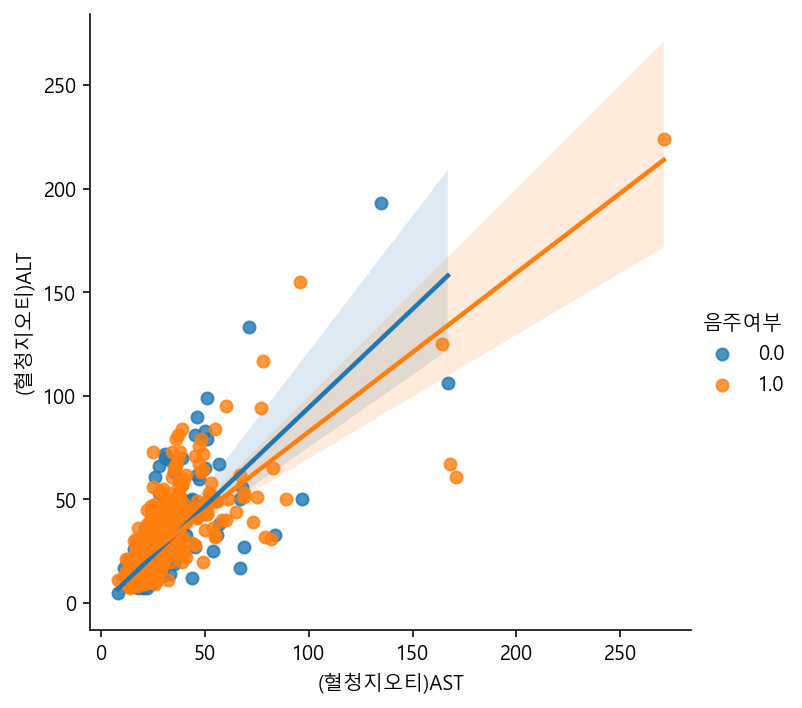

In [125]:
sns.lmplot(data = df_ASLT, x='(혈청지오티)AST', y= '(혈청지오티)ALT', hue = "음주여부")

### **상관계수 구하기(heatmap)**

In [129]:
columns = ['연령대 코드(5세단위)', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기 혈압',
       '이완기 혈압', '식전혈당(공복혈당)', '총 콜레스테롤', '트리글리세라이드', 'HDL 콜레스테롤', 'LDL 콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마 지티피', '흡연상태',
       '음주여부']

df_small = df_sample[columns]
df_corr = df_small.corr()
df_corr.head()

,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기 혈압,이완기 혈압,...,HDL 콜레스테롤,LDL 콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부
연령대 코드(5세단위),1.000000,-0.414363,-0.221678,0.102985,-0.237792,-0.137480,0.184846,0.203279,0.216743,-0.038870,...,-0.061317,-0.232499,-0.199607,0.029036,0.056892,0.034710,-0.040384,-0.066488,-0.164761,-0.351909
신장(5Cm단위),-0.414363,1.000000,0.658184,0.343317,0.152171,0.128649,-0.076783,-0.084849,0.012064,0.187853,...,-0.217301,0.086425,0.529142,0.018102,0.332333,0.017348,0.105957,0.188727,0.472717,0.382014
체중(5Kg 단위),-0.221678,0.658184,1.000000,0.805619,0.081166,0.079245,-0.028658,-0.048024,0.215313,0.283006,...,-0.376817,0.048177,0.442815,0.047369,0.295684,0.043985,0.166618,0.188488,0.354371,0.249972
허리둘레,0.102985,0.343317,0.805619,1.000000,-0.044147,0.009605,0.045806,0.040701,0.283801,0.244159,...,-0.371869,-0.010353,0.309017,0.081128,0.274298,0.049168,0.155557,0.189805,0.238003,0.104278
시력(좌),-0.237792,0.152171,0.081166,-0.044147,1.000000,0.433458,-0.047886,-0.074372,-0.052692,0.052792,...,0.083304,0.121976,0.177170,-0.045523,0.012852,0.033127,0.062018,0.034567,0.080803,0.103582


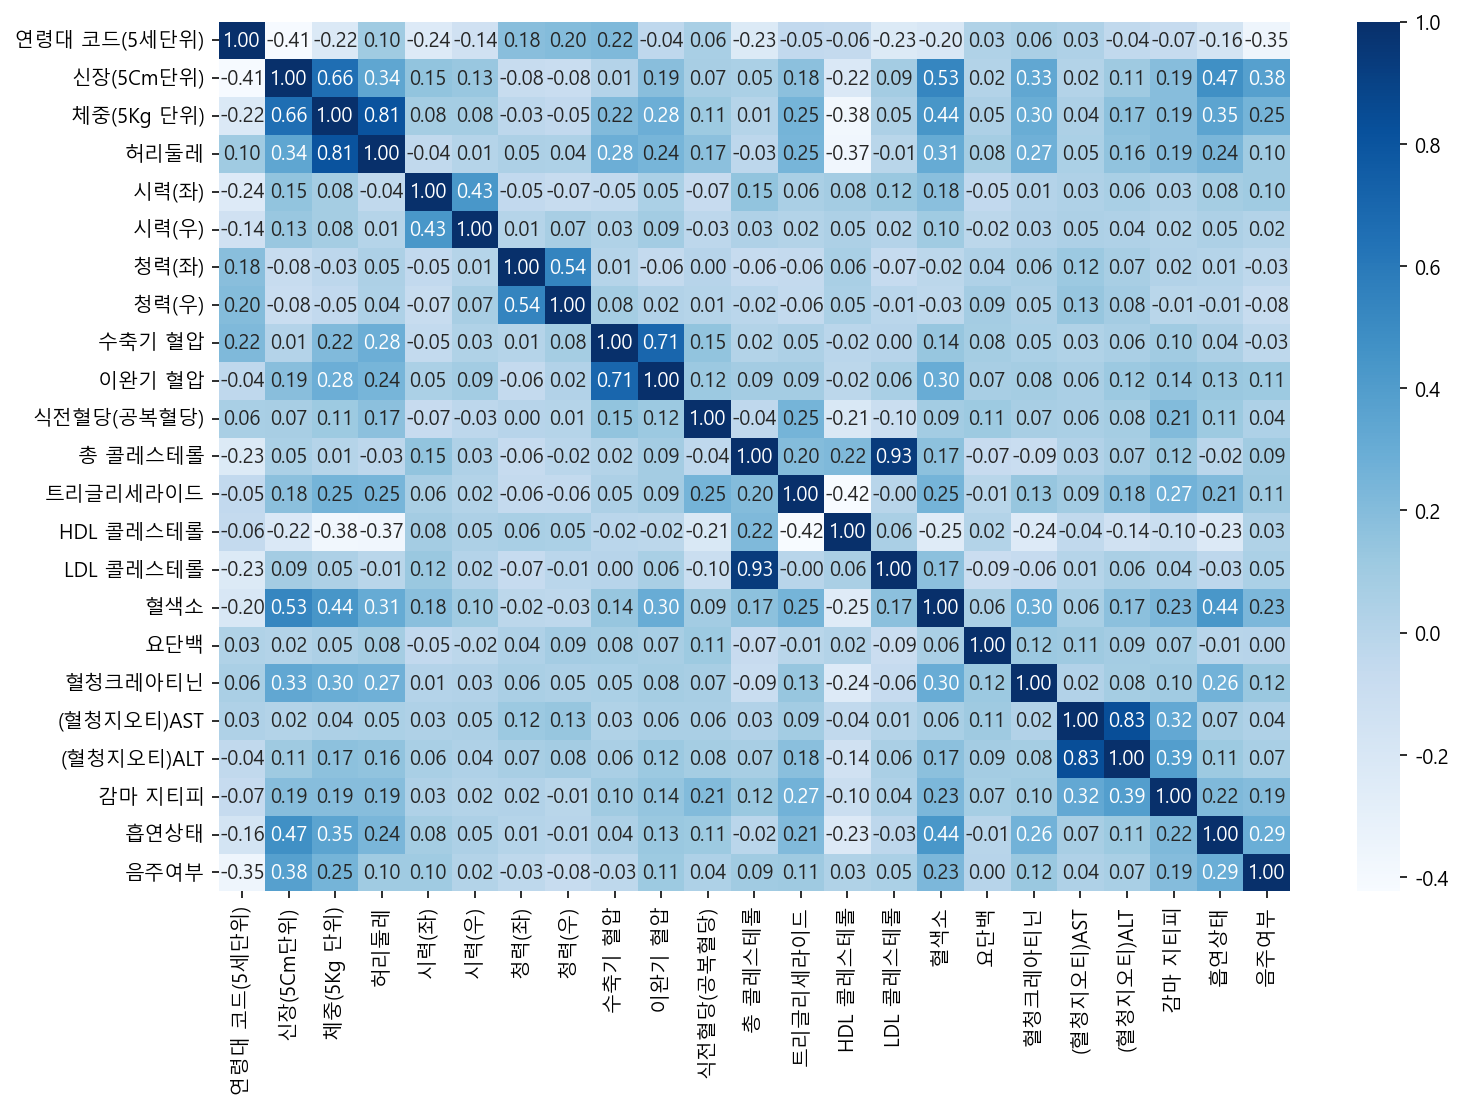

In [136]:
plt.figure(figsize = (12,8))
hmap = sns.heatmap(df_corr, annot=True, fmt=".2f", cmap = "Blues")